# CNN 모델 학습

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

In [7]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1.0,))])
download_root = './Data'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

batch_size = 512
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

데이터 확인

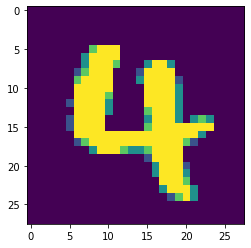

In [15]:
data, label = train_dataloader.__iter__().__next__()
data = data[0]
label = label[0]

import matplotlib.pyplot as plt
plt.imshow(data[0,:,:])

# 모델 구성 방법

## 단순한 방법

In [18]:
model = nn.Linear(in_features=1, out_features=1, bias=True)

In [19]:
model

Linear(in_features=1, out_features=1, bias=True)

## nn.Sequential 사용

In [21]:
sequential_model = nn.Sequential(
    nn.Linear(in_features=1, out_features=20, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=1, bias=True),
)

In [22]:
sequential_model

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)

## 함수로 정의하는 방법

In [23]:
def TwoLayerNet(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=in_features, out_features=out_features, bias=True)
    
    net = nn.Sequential(hidden, activation, output)
    
    return net

model = TwoLayerNet(1, 20, 1)

## nn.Module을 상속한 클래스를 정의하는 방법

In [27]:
class TwoLinearLayerNet(nn.Module):
    
    def __init__(self, in_features, hidden_features, out_features):
        super(TwoLinearLayerNet, self).__init__()
        self.linear1 = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
        self.linear2 = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        return self.linear2(x)
    
model = TwoLinearLayerNet(1, 20, 1)
model

TwoLinearLayerNet(
  (linear1): Linear(in_features=1, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=1, bias=True)
)

# 직접 모델을 만들고 학습과정 살펴보기

In [42]:
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__()
        # input is (batch, 1, 28, 28)
        # padding=2 for same padding
        self.conv1 = nn.Conv2d(1, 32, 3, padding=2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=2)
        self.fc1 = nn.Linear(64*7*7, 1024)
        self.fc2 = nn.Linear(1024, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64*7*7)
        x = fc1(x)
        x = F.relu(x)
        x = fc2(x)
        return F.log_softmax(x)

In [44]:
model = MnistModel()
model

MnistModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [48]:
len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(118, 20, 20)